In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("air_quality_health_impact_data.csv")

In [4]:
df.head(5)

,RecordID,AQI,PM10,PM2_5,NO2,SO2,O3,Temperature,Humidity,WindSpeed,RespiratoryCases,CardiovascularCases,HospitalAdmissions,HealthImpactScore,HealthImpactClass
0,1,187.270059,295.853039,13.038560,6.639263,66.161150,54.624280,5.150335,84.424344,6.137755,7,5,1,97.244041,0.0
1,2,475.357153,246.254703,9.984497,16.318326,90.499523,169.621728,1.543378,46.851415,4.521422,10,2,0,100.000000,0.0
2,3,365.996971,84.443191,23.111340,96.317811,17.875850,9.006794,1.169483,17.806977,11.157384,13,3,0,100.000000,0.0
3,4,299.329242,21.020609,14.273403,81.234403,48.323616,93.161033,21.925276,99.473373,15.302500,8,8,1,100.000000,0.0
4,5,78.009320,16.987667,152.111623,121.235461,90.866167,241.795138,9.217517,24.906837,14.534733,9,0,1,95.182643,0.0


In [5]:
df.shape

(5811, 15)

In [6]:
df.isnull().sum()

RecordID               0
AQI                    0
PM10                   0
PM2_5                  0
NO2                    0
SO2                    0
O3                     0
Temperature            0
Humidity               0
WindSpeed              0
RespiratoryCases       0
CardiovascularCases    0
HospitalAdmissions     0
HealthImpactScore      0
HealthImpactClass      0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5811 entries, 0 to 5810
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   RecordID             5811 non-null   int64  
 1   AQI                  5811 non-null   float64
 2   PM10                 5811 non-null   float64
 3   PM2_5                5811 non-null   float64
 4   NO2                  5811 non-null   float64
 5   SO2                  5811 non-null   float64
 6   O3                   5811 non-null   float64
 7   Temperature          5811 non-null   float64
 8   Humidity             5811 non-null   float64
 9   WindSpeed            5811 non-null   float64
 10  RespiratoryCases     5811 non-null   int64  
 11  CardiovascularCases  5811 non-null   int64  
 12  HospitalAdmissions   5811 non-null   int64  
 13  HealthImpactScore    5811 non-null   float64
 14  HealthImpactClass    5811 non-null   float64
dtypes: float64(11), int64(4)
memory usage:

In [8]:
df.describe()

,RecordID,AQI,PM10,PM2_5,NO2,SO2,O3,Temperature,Humidity,WindSpeed,RespiratoryCases,CardiovascularCases,HospitalAdmissions,HealthImpactScore,HealthImpactClass
count,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000,5811.000000
mean,2906.000000,248.438476,148.654997,100.223714,102.293445,49.456838,149.312431,14.975500,54.776853,9.989177,9.974187,4.988986,2.001033,93.785223,0.281191
std,1677.635538,144.777638,85.698500,58.096612,57.713175,28.530329,86.534240,14.483067,26.020786,5.776950,3.129234,2.216791,1.398794,13.318904,0.714075
min,1.000000,0.005817,0.015848,0.031549,0.009625,0.011023,0.001661,-9.990998,10.001506,0.002094,1.000000,0.000000,0.000000,22.448488,0.000000
25%,1453.500000,122.951293,75.374954,49.435171,53.538538,24.887264,73.999665,2.481500,31.995262,4.952343,8.000000,3.000000,1.000000,98.203057,0.000000
50%,2906.000000,249.127841,147.634997,100.506337,102.987736,49.530165,149.559871,14.942428,54.543904,10.051742,10.000000,5.000000,2.000000,100.000000,0.000000
75%,4358.500000,373.630668,222.436759,151.340260,151.658516,73.346617,223.380126,27.465374,77.641639,14.971840,12.000000,6.000000,3.000000,100.000000,0.000000
max,5811.000000,499.858837,299.901962,199.984965,199.980195,99.969561,299.936812,39.963434,99.997493,19.999139,23.000000,14.000000,12.000000,100.000000,4.000000


In [9]:
df.duplicated().sum()

0

In [10]:
df.drop(columns=['HealthImpactClass'], inplace = True)

In [11]:
df.shape

(5811, 14)

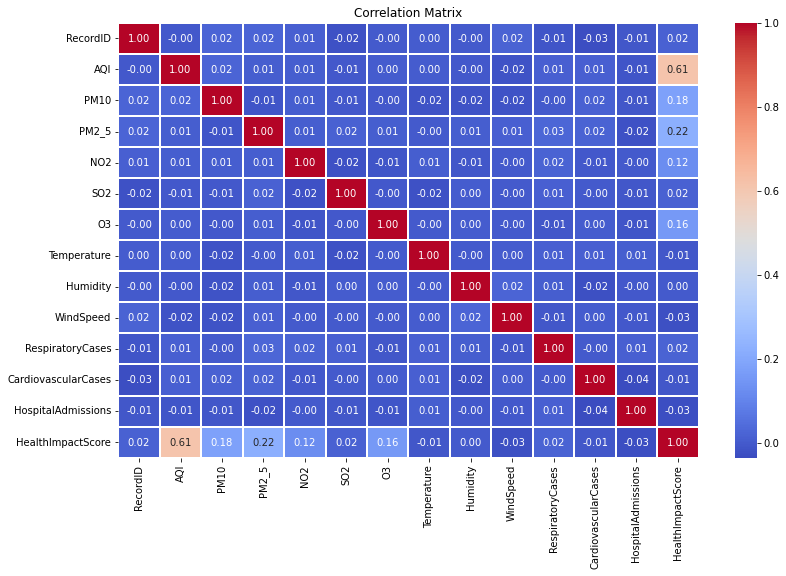

In [13]:
plt.figure(figsize=(13,8))
sns.heatmap(df.corr(), annot= True, cmap= 'coolwarm', linewidth= 0.2, fmt= "0.2f")
plt.title('Correlation Matrix')
plt.show()

In [15]:
cols = df.columns.tolist()
len(cols)
cols

['RecordID',
 'AQI',
 'PM10',
 'PM2_5',
 'NO2',
 'SO2',
 'O3',
 'Temperature',
 'Humidity',
 'WindSpeed',
 'RespiratoryCases',
 'CardiovascularCases',
 'HospitalAdmissions',
 'HealthImpactScore']

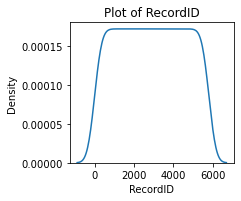

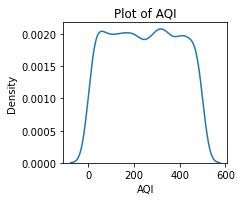

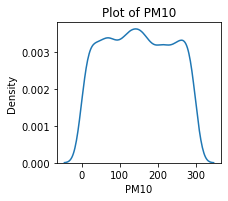

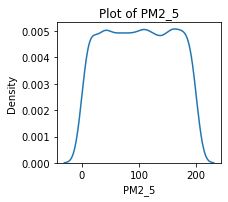

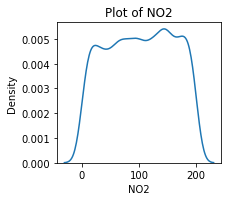

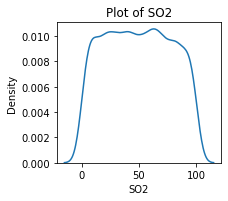

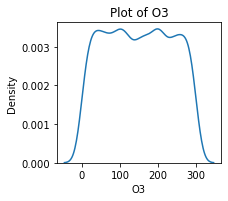

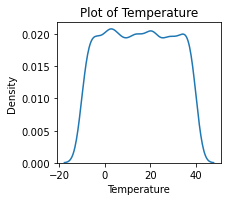

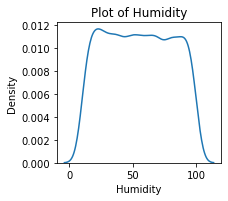

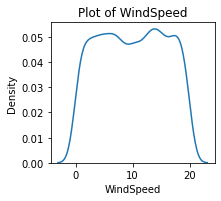

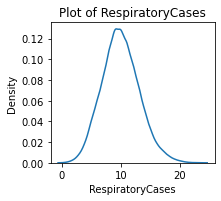

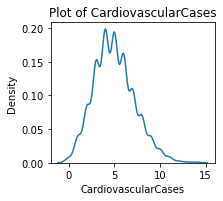

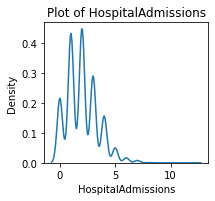

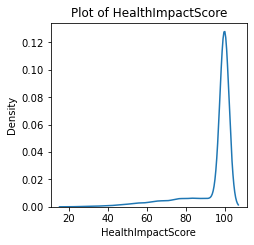

In [18]:
length = len(cols)
row = (length+2)//3

for i, variable in enumerate(cols):
    plt.figure(figsize = (10,15))
    plt.subplot(row, 3, i+1)
    plt.title(f'Plot of {variable}')
    sns.kdeplot(df[variable])
    
plt.tight_layout()
plt.show()

In [19]:
df.skew()

RecordID               0.000000
AQI                    0.010608
PM10                   0.019243
PM2_5                 -0.002834
NO2                   -0.053589
SO2                    0.025574
O3                     0.011182
Temperature            0.004898
Humidity               0.023063
WindSpeed             -0.011078
RespiratoryCases       0.255866
CardiovascularCases    0.445664
HospitalAdmissions     0.715323
HealthImpactScore     -2.350709
dtype: float64

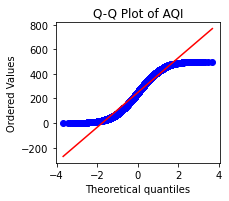

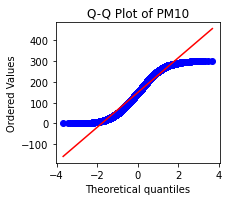

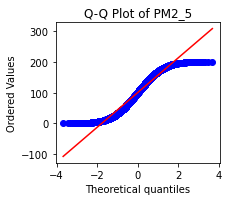

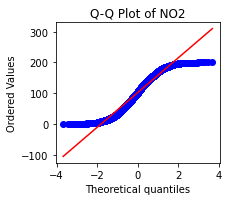

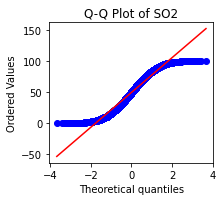

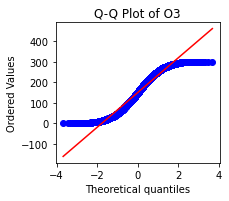

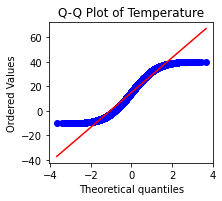

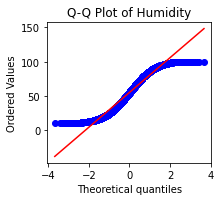

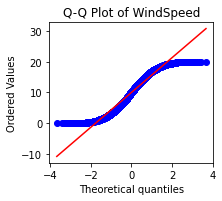

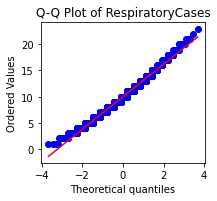

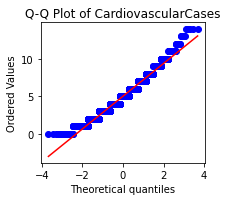

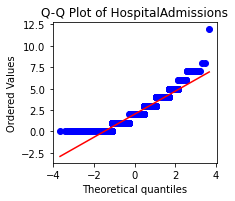

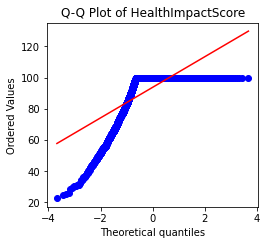

In [20]:
import scipy.stats as stats
col= ['AQI',
 'PM10',
 'PM2_5',
 'NO2',
 'SO2',
 'O3',
 'Temperature',
 'Humidity',
 'WindSpeed',
 'RespiratoryCases',
 'CardiovascularCases',
 'HospitalAdmissions',
 'HealthImpactScore']

length = len(col)
row = (length+2)//3

for j, var in enumerate(col):
    plt.figure(figsize=(10,15))
    plt.subplot(row, 3, j+1)
    stats.probplot(df[var], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of {var}')
    
plt.tight_layout()
plt.show()

/home/prashant/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/prashant/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/prashant/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/

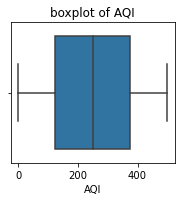

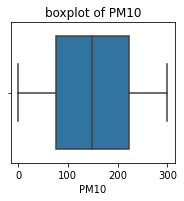

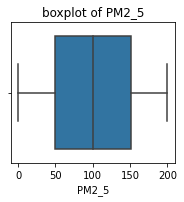

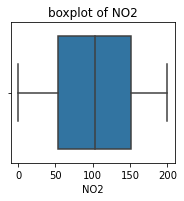

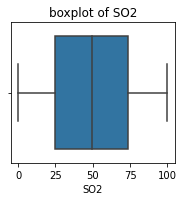

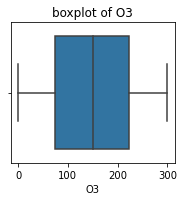

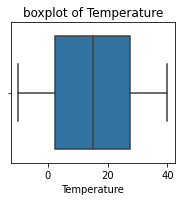

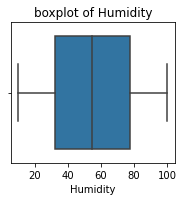

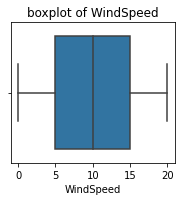

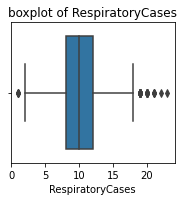

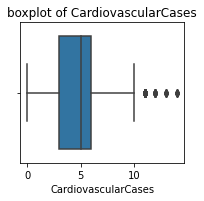

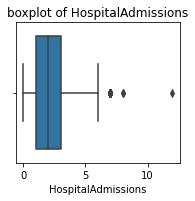

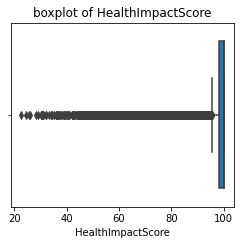

In [21]:
for k, var in enumerate(col):
    plt.figure(figsize = (10,15))
    plt.subplot(row, 3, k+1)
    sns.boxplot(df[var])
    plt.title(f'boxplot of {var}')

plt.tight_layout()
plt.show()

<AxesSubplot:ylabel='Density'>

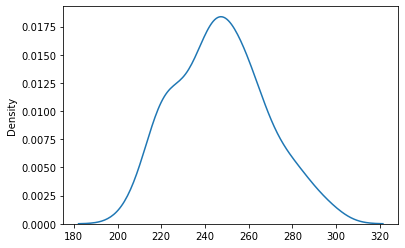

In [22]:
samples= []
for i in range(100):
    samples.append(df['AQI'].sample(50).values.tolist())
    
samples=np.array(samples)
samples
sampling_mean= samples.mean(axis=1)
sns.kdeplot(sampling_mean)

In [23]:
sampling_std = samples.std(axis=1)
print("mean of sampling_std: ", sampling_std.mean())
print("mean of sampling_mean: ",sampling_mean.mean())

mean of sampling_std:  141.73261977720267
mean of sampling_mean:  247.12360029178888


In [24]:
lower_limit= sampling_mean.mean() - 2*sampling_std.mean()/np.sqrt(50)
upper_limit= sampling_mean.mean() + 2*sampling_std.mean()/np.sqrt(50)
print(lower_limit, " - " ,upper_limit)

207.03556166787104  -  287.2116389157067


In [26]:
df['AQI'].mean()

248.43847634018505

In [27]:
type(sampling_mean.tolist())
list_mean= sampling_mean.tolist()
count=0
for value in list_mean:
    if lower_limit <= value <= upper_limit:
        count+=1
count               

96

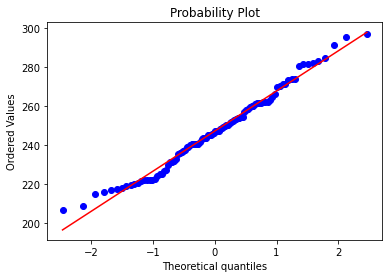

In [28]:
stats.probplot(sampling_mean, dist="norm", plot=plt)
plt.show()

In [29]:
X= df.drop(columns=['RecordID','HealthImpactScore'])
y= df['HealthImpactScore']

In [30]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.25,random_state=42)

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score

In [32]:
from sklearn.linear_model import LinearRegression

step1= StandardScaler()
step2= LinearRegression()

pipe_lr= Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe_lr.fit(X_train,y_train)
y_pred_lr= pipe_lr.predict(X_test)

print("r2_score LR: " ,r2_score(y_test,y_pred_lr))
cvs_lr= cross_val_score(pipe_lr,X,y,cv=5)
print("cross val mean score: ",cvs_lr.mean())

r2_score LR:  0.5017212965560347
cross val mean score:  0.48914427176254394


In [33]:
from sklearn.tree import DecisionTreeRegressor

regressor= DecisionTreeRegressor()

pipe_dt= Pipeline([
    ('step1', step1),
    ('regressor', regressor)
])

pipe_dt.fit(X_train,y_train)
y_pred_dt= pipe_dt.predict(X_test)

print("r2_score DT: " ,r2_score(y_test,y_pred_dt))
cvs_dt= cross_val_score(pipe_dt,X,y,cv=5)
print(cvs_dt)
print("cross val mean score DT: ",cvs_dt.mean())

r2_score DT:  0.8320111977695984
[0.86593494 0.82255764 0.85596147 0.87247304 0.82534831]
cross val mean score DT:  0.8484550813379265


In [34]:
param_grid= {
    'regressor__max_depth': [5, 7, 10],
    'regressor__min_samples_leaf': [2, 4],
    'regressor__min_samples_split': [10, 15, 25],
    'regressor__max_features': [None, 'sqrt', 'log2']
}

dt_grid= GridSearchCV(estimator= pipe_dt,
                     param_grid= param_grid,
                     cv=5,
                     verbose=2,
                     n_jobs=-1)

In [35]:
dt_grid.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('step1', StandardScaler()),
                                       ('regressor', DecisionTreeRegressor())]),
             n_jobs=-1,
             param_grid={'regressor__max_depth': [5, 7, 10],
                         'regressor__max_features': [None, 'sqrt', 'log2'],
                         'regressor__min_samples_leaf': [2, 4],
                         'regressor__min_samples_split': [10, 15, 25]},
             verbose=2)

In [36]:
best_model= dt_grid.best_estimator_

In [37]:
y_grid= best_model.predict(X_test)

print("r2_score LR: " ,r2_score(y_test,y_grid))
cvs_dt_grid= cross_val_score(dt_grid,X,y,cv=5)
print(cvs_dt_grid)
print("cross val mean score: ",cvs_dt_grid.mean())

r2_score LR:  0.8636337259962279
Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END regressor__max_depth=5, regressor__max_features=None, regressor__min_samples_leaf=2, regressor__min_samples_split=15; total time=   0.0s
[CV] END regressor__max_depth=5, regressor__max_features=None, regressor__min_samples_leaf=2, regressor__min_samples_split=25; total time=   0.0s
[CV] END regressor__max_depth=5, regressor__max_features=None, regressor__min_samples_leaf=4, regressor__min_samples_split=10; total time=   0.0s
[CV] END regressor__max_depth=5, regressor__max_features=None, regressor__min_samples_leaf=4, regressor__min_samples_split=25; total time=   0.0s
[CV] END regressor__max_depth=5, regressor__max_features=sqrt, regressor__min_samples_leaf=2, regressor__min_samples_split=10; total time=   0.0s
[CV] END regressor__max_depth=5, regressor__max_features=sqrt, regressor__min_samples_leaf=2, regressor__min_samples_split=25; total time=   0.0s
[CV] END regressor__max_depth

[CV] END regressor__max_depth=5, regressor__max_features=None, regressor__min_samples_leaf=2, regressor__min_samples_split=10; total time=   0.0s
[CV] END regressor__max_depth=5, regressor__max_features=None, regressor__min_samples_leaf=4, regressor__min_samples_split=25; total time=   0.0s
[CV] END regressor__max_depth=5, regressor__max_features=sqrt, regressor__min_samples_leaf=2, regressor__min_samples_split=15; total time=   0.0s
[CV] END regressor__max_depth=5, regressor__max_features=sqrt, regressor__min_samples_leaf=4, regressor__min_samples_split=10; total time=   0.0s
[CV] END regressor__max_depth=5, regressor__max_features=log2, regressor__min_samples_leaf=2, regressor__min_samples_split=10; total time=   0.0s
[CV] END regressor__max_depth=5, regressor__max_features=log2, regressor__min_samples_leaf=2, regressor__min_samples_split=10; total time=   0.0s
[CV] END regressor__max_depth=5, regressor__max_features=log2, regressor__min_samples_leaf=4, regressor__min_samples_split=1

[CV] END regressor__max_depth=7, regressor__max_features=sqrt, regressor__min_samples_leaf=2, regressor__min_samples_split=25; total time=   0.0s
[CV] END regressor__max_depth=7, regressor__max_features=sqrt, regressor__min_samples_leaf=2, regressor__min_samples_split=25; total time=   0.0s
[CV] END regressor__max_depth=7, regressor__max_features=sqrt, regressor__min_samples_leaf=2, regressor__min_samples_split=25; total time=   0.0s
[CV] END regressor__max_depth=7, regressor__max_features=sqrt, regressor__min_samples_leaf=4, regressor__min_samples_split=10; total time=   0.0s
[CV] END regressor__max_depth=10, regressor__max_features=None, regressor__min_samples_leaf=2, regressor__min_samples_split=10; total time=   0.0s
[CV] END regressor__max_depth=10, regressor__max_features=None, regressor__min_samples_leaf=2, regressor__min_samples_split=15; total time=   0.0s
[CV] END regressor__max_depth=10, regressor__max_features=None, regressor__min_samples_leaf=2, regressor__min_samples_spli

[CV] END regressor__max_depth=10, regressor__max_features=sqrt, regressor__min_samples_leaf=4, regressor__min_samples_split=25; total time=   0.0s
[CV] END regressor__max_depth=10, regressor__max_features=sqrt, regressor__min_samples_leaf=4, regressor__min_samples_split=25; total time=   0.0s
[CV] END regressor__max_depth=10, regressor__max_features=log2, regressor__min_samples_leaf=2, regressor__min_samples_split=15; total time=   0.0s
[CV] END regressor__max_depth=10, regressor__max_features=log2, regressor__min_samples_leaf=2, regressor__min_samples_split=25; total time=   0.0s
[CV] END regressor__max_depth=10, regressor__max_features=log2, regressor__min_samples_leaf=4, regressor__min_samples_split=10; total time=   0.0s
[CV] END regressor__max_depth=10, regressor__max_features=log2, regressor__min_samples_leaf=4, regressor__min_samples_split=25; total time=   0.0s
[CV] END regressor__max_depth=5, regressor__max_features=None, regressor__min_samples_leaf=2, regressor__min_samples_s

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END regressor__max_depth=5, regressor__max_features=sqrt, regressor__min_samples_leaf=2, regressor__min_samples_split=15; total time=   0.0s
[CV] END regressor__max_depth=5, regressor__max_features=sqrt, regressor__min_samples_leaf=4, regressor__min_samples_split=15; total time=   0.0s
[CV] END regressor__max_depth=5, regressor__max_features=sqrt, regressor__min_samples_leaf=4, regressor__min_samples_split=15; total time=   0.0s
[CV] END regressor__max_depth=5, regressor__max_features=sqrt, regressor__min_samples_leaf=4, regressor__min_samples_split=15; total time=   0.0s
[CV] END regressor__max_depth=5, regressor__max_features=sqrt, regressor__min_samples_leaf=4, regressor__min_samples_split=25; total time=   0.0s
[CV] END regressor__max_depth=5, regressor__max_features=log2, regressor__min_samples_leaf=4, regressor__min_samples_split=15; total time=   0.0s
[CV] END regressor__max_depth=5, regressor__max_features=log2,

[CV] END regressor__max_depth=7, regressor__max_features=None, regressor__min_samples_leaf=4, regressor__min_samples_split=10; total time=   0.0s
[CV] END regressor__max_depth=7, regressor__max_features=None, regressor__min_samples_leaf=4, regressor__min_samples_split=10; total time=   0.0s
[CV] END regressor__max_depth=7, regressor__max_features=None, regressor__min_samples_leaf=4, regressor__min_samples_split=10; total time=   0.0s
[CV] END regressor__max_depth=7, regressor__max_features=log2, regressor__min_samples_leaf=2, regressor__min_samples_split=10; total time=   0.0s
[CV] END regressor__max_depth=7, regressor__max_features=log2, regressor__min_samples_leaf=2, regressor__min_samples_split=10; total time=   0.0s
[CV] END regressor__max_depth=7, regressor__max_features=log2, regressor__min_samples_leaf=2, regressor__min_samples_split=10; total time=   0.0s
[CV] END regressor__max_depth=7, regressor__max_features=log2, regressor__min_samples_leaf=2, regressor__min_samples_split=1

[CV] END regressor__max_depth=7, regressor__max_features=sqrt, regressor__min_samples_leaf=2, regressor__min_samples_split=10; total time=   0.0s
[CV] END regressor__max_depth=7, regressor__max_features=sqrt, regressor__min_samples_leaf=2, regressor__min_samples_split=10; total time=   0.0s
[CV] END regressor__max_depth=7, regressor__max_features=sqrt, regressor__min_samples_leaf=2, regressor__min_samples_split=10; total time=   0.0s
[CV] END regressor__max_depth=7, regressor__max_features=sqrt, regressor__min_samples_leaf=2, regressor__min_samples_split=10; total time=   0.0s
[CV] END regressor__max_depth=7, regressor__max_features=sqrt, regressor__min_samples_leaf=2, regressor__min_samples_split=10; total time=   0.0s
[CV] END regressor__max_depth=7, regressor__max_features=sqrt, regressor__min_samples_leaf=2, regressor__min_samples_split=15; total time=   0.0s
[CV] END regressor__max_depth=7, regressor__max_features=sqrt, regressor__min_samples_leaf=2, regressor__min_samples_split=1

[CV] END regressor__max_depth=5, regressor__max_features=log2, regressor__min_samples_leaf=2, regressor__min_samples_split=25; total time=   0.0s[0.88826262 0.85664417 0.88081678 0.8873304  0.85273801]
cross val mean score:  0.8731583961839933


In [38]:
dt_grid.best_params_

{'regressor__max_depth': 10,
 'regressor__max_features': None,
 'regressor__min_samples_leaf': 4,
 'regressor__min_samples_split': 10}

In [39]:
best_regressor= best_model.named_steps['regressor']
feature_importance= best_regressor.feature_importances_

In [40]:
np.argsort(feature_importance)[::-1]

array([ 0,  2,  1,  5,  3,  8,  7,  6,  9,  4, 11, 10])

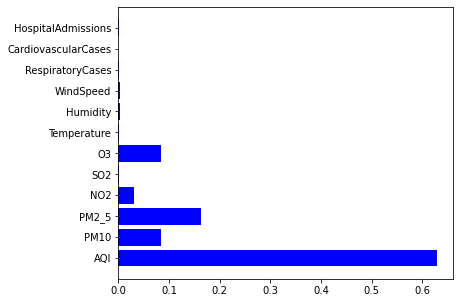

In [41]:
features= X_train.columns

plt.figure(figsize=(6,5))
plt.barh(features, feature_importance, color='blue')
plt.show()

In [42]:
from sklearn.ensemble import RandomForestRegressor

regressorRF= RandomForestRegressor()

pipe_rf= Pipeline([
    ('step1',step1),
    ('regressorRF',regressorRF)
])

pipe_rf.fit(X_train,y_train)
y_pred_rf= pipe_rf.predict(X_test)

print("r2_score RF: ",r2_score(y_test,y_pred_rf))
cvs_rf= cross_val_score(pipe_rf,X,y,cv=5)
print("cross_val_score RF: ",cvs_rf)
print("mean of cross_val_score RF: ",cvs_rf.mean())

r2_score RF:  0.9432488313340885
cross_val_score RF:  [0.95609025 0.95428715 0.94913824 0.94243003 0.94559481]
mean of cross_val_score RF:  0.9495080985509443


In [43]:
param_grid= {
    'regressorRF__max_features':['sqrt','log2',None],
    'regressorRF__max_samples':[0.5, 0.75],
    'regressorRF__max_depth':[5,7,10],
    'regressorRF__min_samples_split':[10,15,25],
}

rf_grid= GridSearchCV(estimator= pipe_rf,
                     param_grid=param_grid,
                     verbose=2,
                      cv=5,
                     n_jobs=-1)

In [44]:
rf_grid.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END regressor__max_depth=7, regressor__max_features=log2, regressor__min_samples_leaf=4, regressor__min_samples_split=25; total time=   0.0s
[CV] END regressor__max_depth=10, regressor__max_features=None, regressor__min_samples_leaf=2, regressor__min_samples_split=10; total time=   0.0s
[CV] END regressor__max_depth=10, regressor__max_features=None, regressor__min_samples_leaf=2, regressor__min_samples_split=10; total time=   0.0s
[CV] END regressor__max_depth=10, regressor__max_features=None, regressor__min_samples_leaf=2, regressor__min_samples_split=10; total time=   0.0s
[CV] END regressor__max_depth=10, regressor__max_features=None, regressor__min_samples_leaf=2, regressor__min_samples_split=10; total time=   0.0s
[CV] END regressor__max_depth=10, regressor__max_features=log2, regressor__min_samples_leaf=2, regressor__min_samples_split=10; total time=   0.0s
[CV] END regressor__max_depth=10, regressor__max_features

[CV] END regressor__max_depth=10, regressor__max_features=log2, regressor__min_samples_leaf=4, regressor__min_samples_split=10; total time=   0.0s
[CV] END regressor__max_depth=10, regressor__max_features=log2, regressor__min_samples_leaf=4, regressor__min_samples_split=15; total time=   0.0s
[CV] END regressor__max_depth=10, regressor__max_features=log2, regressor__min_samples_leaf=4, regressor__min_samples_split=25; total time=   0.0s
[CV] END regressor__max_depth=5, regressor__max_features=None, regressor__min_samples_leaf=2, regressor__min_samples_split=10; total time=   0.0s
[CV] END regressor__max_depth=5, regressor__max_features=None, regressor__min_samples_leaf=2, regressor__min_samples_split=25; total time=   0.0s
[CV] END regressor__max_depth=5, regressor__max_features=None, regressor__min_samples_leaf=4, regressor__min_samples_split=25; total time=   0.0s
[CV] END regressor__max_depth=5, regressor__max_features=None, regressor__min_samples_leaf=4, regressor__min_samples_spli

[CV] END regressor__max_depth=5, regressor__max_features=None, regressor__min_samples_leaf=4, regressor__min_samples_split=10; total time=   0.0s
[CV] END regressor__max_depth=5, regressor__max_features=None, regressor__min_samples_leaf=4, regressor__min_samples_split=10; total time=   0.0s
[CV] END regressor__max_depth=5, regressor__max_features=sqrt, regressor__min_samples_leaf=2, regressor__min_samples_split=15; total time=   0.0s
[CV] END regressor__max_depth=5, regressor__max_features=sqrt, regressor__min_samples_leaf=2, regressor__min_samples_split=15; total time=   0.0s
[CV] END regressor__max_depth=5, regressor__max_features=sqrt, regressor__min_samples_leaf=4, regressor__min_samples_split=25; total time=   0.0s
[CV] END regressor__max_depth=5, regressor__max_features=sqrt, regressor__min_samples_leaf=4, regressor__min_samples_split=25; total time=   0.0s
[CV] END regressor__max_depth=5, regressor__max_features=sqrt, regressor__min_samples_leaf=4, regressor__min_samples_split=2

[CV] END regressor__max_depth=5, regressor__max_features=None, regressor__min_samples_leaf=4, regressor__min_samples_split=15; total time=   0.0s
[CV] END regressor__max_depth=5, regressor__max_features=None, regressor__min_samples_leaf=4, regressor__min_samples_split=15; total time=   0.0s
[CV] END regressor__max_depth=5, regressor__max_features=sqrt, regressor__min_samples_leaf=2, regressor__min_samples_split=25; total time=   0.0s
[CV] END regressor__max_depth=5, regressor__max_features=sqrt, regressor__min_samples_leaf=2, regressor__min_samples_split=25; total time=   0.0s
[CV] END regressor__max_depth=5, regressor__max_features=log2, regressor__min_samples_leaf=2, regressor__min_samples_split=15; total time=   0.0s
[CV] END regressor__max_depth=5, regressor__max_features=log2, regressor__min_samples_leaf=2, regressor__min_samples_split=15; total time=   0.0s
[CV] END regressor__max_depth=5, regressor__max_features=log2, regressor__min_samples_leaf=2, regressor__min_samples_split=2

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('step1', StandardScaler()),
                                       ('regressorRF',
                                        RandomForestRegressor())]),
             n_jobs=-1,
             param_grid={'regressorRF__max_depth': [5, 7, 10],
                         'regressorRF__max_features': ['sqrt', 'log2', None],
                         'regressorRF__max_samples': [0.5, 0.75],
                         'regressorRF__min_samples_split': [10, 15, 25]},
             verbose=2)

In [45]:
best_model_rf= rf_grid.best_estimator_

y_grid_rf= best_model_rf.predict(X_test)

print("r2_score after hyperparameter tuning: ", r2_score(y_test,y_grid_rf))
cvs_grid_rf= cross_val_score(rf_grid,X,y,cv=5)
print(cvs_grid_rf)
print("mean cross_val_score after hyperparameter tuning: ",cvs_grid_rf.mean())

r2_score after hyperparameter tuning:  0.9343712524749893
Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END regressorRF__max_depth=5, regressorRF__max_features=None, regressorRF__max_samples=0.5, regressorRF__min_samples_split=10; total time=   0.9s
[CV] END regressorRF__max_depth=5, regressorRF__max_features=None, regressorRF__max_samples=0.5, regressorRF__min_samples_split=15; total time=   0.9s
[CV] END regressorRF__max_depth=5, regressorRF__max_features=None, regressorRF__max_samples=0.75, regressorRF__min_samples_split=10; total time=   1.1s
[CV] END regressorRF__max_depth=5, regressorRF__max_features=None, regressorRF__max_samples=0.75, regressorRF__min_samples_split=15; total time=   1.1s
[CV] END regressorRF__max_depth=7, regressorRF__max_features=sqrt, regressorRF__max_samples=0.5, regressorRF__min_samples_split=15; total time=   0.4s
[CV] END regressorRF__max_depth=7, regressorRF__max_features=sqrt, regressorRF__max_samples=0.5, regressorRF__min_samples_s

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END regressorRF__max_depth=7, regressorRF__max_features=log2, regressorRF__max_samples=0.75, regressorRF__min_samples_split=10; total time=   0.5s
[CV] END regressorRF__max_depth=7, regressorRF__max_features=log2, regressorRF__max_samples=0.75, regressorRF__min_samples_split=25; total time=   0.5s
[CV] END regressorRF__max_depth=7, regressorRF__max_features=None, regressorRF__max_samples=0.5, regressorRF__min_samples_split=15; total time=   1.0s
[CV] END regressorRF__max_depth=7, regressorRF__max_features=None, regressorRF__max_samples=0.5, regressorRF__min_samples_split=25; total time=   1.0s
[CV] END regressorRF__max_depth=7, regressorRF__max_features=None, regressorRF__max_samples=0.75, regressorRF__min_samples_split=15; total time=   1.5s
[CV] END regressorRF__max_depth=10, regressorRF__max_features=sqrt, regressorRF__max_samples=0.5, regressorRF__min_samples_split=10; total time=   0.5s
[CV] END regressorRF__max_de

[CV] END regressorRF__max_depth=7, regressorRF__max_features=None, regressorRF__max_samples=0.75, regressorRF__min_samples_split=25; total time=   1.4s
[CV] END regressorRF__max_depth=10, regressorRF__max_features=sqrt, regressorRF__max_samples=0.5, regressorRF__min_samples_split=15; total time=   0.5s
[CV] END regressorRF__max_depth=10, regressorRF__max_features=sqrt, regressorRF__max_samples=0.75, regressorRF__min_samples_split=10; total time=   0.7s
[CV] END regressorRF__max_depth=10, regressorRF__max_features=sqrt, regressorRF__max_samples=0.75, regressorRF__min_samples_split=25; total time=   0.6s
[CV] END regressorRF__max_depth=10, regressorRF__max_features=log2, regressorRF__max_samples=0.5, regressorRF__min_samples_split=15; total time=   0.5s
[CV] END regressorRF__max_depth=10, regressorRF__max_features=log2, regressorRF__max_samples=0.5, regressorRF__min_samples_split=25; total time=   0.5s
[CV] END regressorRF__max_depth=10, regressorRF__max_features=log2, regressorRF__max_s

[CV] END regressorRF__max_depth=10, regressorRF__max_features=log2, regressorRF__max_samples=0.5, regressorRF__min_samples_split=25; total time=   0.4s
[CV] END regressorRF__max_depth=10, regressorRF__max_features=log2, regressorRF__max_samples=0.75, regressorRF__min_samples_split=10; total time=   0.6s
[CV] END regressorRF__max_depth=10, regressorRF__max_features=log2, regressorRF__max_samples=0.75, regressorRF__min_samples_split=25; total time=   0.6s
[CV] END regressorRF__max_depth=10, regressorRF__max_features=None, regressorRF__max_samples=0.5, regressorRF__min_samples_split=10; total time=   1.1s
[CV] END regressorRF__max_depth=10, regressorRF__max_features=None, regressorRF__max_samples=0.5, regressorRF__min_samples_split=25; total time=   1.1s
[CV] END regressorRF__max_depth=10, regressorRF__max_features=None, regressorRF__max_samples=0.75, regressorRF__min_samples_split=15; total time=   1.5s
[CV] END regressorRF__max_depth=10, regressorRF__max_features=None, regressorRF__max_

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END regressorRF__max_depth=10, regressorRF__max_features=log2, regressorRF__max_samples=0.5, regressorRF__min_samples_split=15; total time=   0.5s
[CV] END regressorRF__max_depth=10, regressorRF__max_features=log2, regressorRF__max_samples=0.75, regressorRF__min_samples_split=10; total time=   0.7s
[CV] END regressorRF__max_depth=10, regressorRF__max_features=log2, regressorRF__max_samples=0.75, regressorRF__min_samples_split=15; total time=   0.6s
[CV] END regressorRF__max_depth=10, regressorRF__max_features=None, regressorRF__max_samples=0.5, regressorRF__min_samples_split=10; total time=   1.3s
[CV] END regressorRF__max_depth=10, regressorRF__max_features=None, regressorRF__max_samples=0.5, regressorRF__min_samples_split=15; total time=   1.3s
[CV] END regressorRF__max_depth=10, regressorRF__max_features=None, regressorRF__max_samples=0.75, regressorRF__min_samples_split=10; total time=   1.8s
[CV] END regressorRF__m

[CV] END regressorRF__max_depth=5, regressorRF__max_features=sqrt, regressorRF__max_samples=0.75, regressorRF__min_samples_split=25; total time=   0.4s
[CV] END regressorRF__max_depth=5, regressorRF__max_features=log2, regressorRF__max_samples=0.5, regressorRF__min_samples_split=15; total time=   0.4s
[CV] END regressorRF__max_depth=5, regressorRF__max_features=log2, regressorRF__max_samples=0.5, regressorRF__min_samples_split=25; total time=   0.4s
[CV] END regressorRF__max_depth=5, regressorRF__max_features=log2, regressorRF__max_samples=0.75, regressorRF__min_samples_split=15; total time=   0.4s
[CV] END regressorRF__max_depth=5, regressorRF__max_features=log2, regressorRF__max_samples=0.75, regressorRF__min_samples_split=25; total time=   0.4s
[CV] END regressorRF__max_depth=5, regressorRF__max_features=None, regressorRF__max_samples=0.5, regressorRF__min_samples_split=15; total time=   0.9s
[CV] END regressorRF__max_depth=5, regressorRF__max_features=None, regressorRF__max_samples

[CV] END regressorRF__max_depth=5, regressorRF__max_features=log2, regressorRF__max_samples=0.75, regressorRF__min_samples_split=25; total time=   0.4s
[CV] END regressorRF__max_depth=5, regressorRF__max_features=None, regressorRF__max_samples=0.5, regressorRF__min_samples_split=15; total time=   0.9s
[CV] END regressorRF__max_depth=5, regressorRF__max_features=None, regressorRF__max_samples=0.5, regressorRF__min_samples_split=25; total time=   0.9s
[CV] END regressorRF__max_depth=5, regressorRF__max_features=None, regressorRF__max_samples=0.75, regressorRF__min_samples_split=15; total time=   1.2s
[CV] END regressorRF__max_depth=5, regressorRF__max_features=None, regressorRF__max_samples=0.75, regressorRF__min_samples_split=25; total time=   1.2s
[CV] END regressorRF__max_depth=7, regressorRF__max_features=sqrt, regressorRF__max_samples=0.5, regressorRF__min_samples_split=25; total time=   0.4s
[CV] END regressorRF__max_depth=7, regressorRF__max_features=sqrt, regressorRF__max_samples

[CV] END regressorRF__max_depth=7, regressorRF__max_features=sqrt, regressorRF__max_samples=0.75, regressorRF__min_samples_split=10; total time=   0.5s
[CV] END regressorRF__max_depth=7, regressorRF__max_features=sqrt, regressorRF__max_samples=0.75, regressorRF__min_samples_split=25; total time=   0.5s
[CV] END regressorRF__max_depth=7, regressorRF__max_features=log2, regressorRF__max_samples=0.5, regressorRF__min_samples_split=10; total time=   0.4s
[CV] END regressorRF__max_depth=7, regressorRF__max_features=log2, regressorRF__max_samples=0.5, regressorRF__min_samples_split=25; total time=   0.4s
[CV] END regressorRF__max_depth=7, regressorRF__max_features=log2, regressorRF__max_samples=0.75, regressorRF__min_samples_split=15; total time=   0.5s
[CV] END regressorRF__max_depth=7, regressorRF__max_features=log2, regressorRF__max_samples=0.75, regressorRF__min_samples_split=25; total time=   0.5s
[CV] END regressorRF__max_depth=7, regressorRF__max_features=None, regressorRF__max_sample

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END regressorRF__max_depth=7, regressorRF__max_features=sqrt, regressorRF__max_samples=0.75, regressorRF__min_samples_split=15; total time=   0.5s
[CV] END regressorRF__max_depth=7, regressorRF__max_features=sqrt, regressorRF__max_samples=0.75, regressorRF__min_samples_split=25; total time=   0.6s
[CV] END regressorRF__max_depth=7, regressorRF__max_features=log2, regressorRF__max_samples=0.5, regressorRF__min_samples_split=15; total time=   0.4s
[CV] END regressorRF__max_depth=7, regressorRF__max_features=log2, regressorRF__max_samples=0.75, regressorRF__min_samples_split=10; total time=   0.5s
[CV] END regressorRF__max_depth=7, regressorRF__max_features=log2, regressorRF__max_samples=0.75, regressorRF__min_samples_split=15; total time=   0.5s
[CV] END regressorRF__max_depth=7, regressorRF__max_features=None, regressorRF__max_samples=0.5, regressorRF__min_sam

[CV] END regressorRF__max_depth=7, regressorRF__max_features=None, regressorRF__max_samples=0.5, regressorRF__min_samples_split=25; total time=   1.1s
[CV] END regressorRF__max_depth=7, regressorRF__max_features=None, regressorRF__max_samples=0.75, regressorRF__min_samples_split=10; total time=   1.5s
[CV] END regressorRF__max_depth=7, regressorRF__max_features=None, regressorRF__max_samples=0.75, regressorRF__min_samples_split=25; total time=   1.5s
[CV] END regressorRF__max_depth=10, regressorRF__max_features=sqrt, regressorRF__max_samples=0.5, regressorRF__min_samples_split=15; total time=   0.5s
[CV] END regressorRF__max_depth=10, regressorRF__max_features=sqrt, regressorRF__max_samples=0.75, regressorRF__min_samples_split=10; total time=   0.7s
[CV] END regressorRF__max_depth=10, regressorRF__max_features=sqrt, regressorRF__max_samples=0.75, regressorRF__min_samples_split=15; total time=   0.6s
[CV] END regressorRF__max_depth=10, regressorRF__max_features=log2, regressorRF__max_sa

[CV] END regressorRF__max_depth=10, regressorRF__max_features=sqrt, regressorRF__max_samples=0.75, regressorRF__min_samples_split=10; total time=   0.7s
[CV] END regressorRF__max_depth=10, regressorRF__max_features=sqrt, regressorRF__max_samples=0.75, regressorRF__min_samples_split=25; total time=   0.6s
[CV] END regressorRF__max_depth=10, regressorRF__max_features=log2, regressorRF__max_samples=0.5, regressorRF__min_samples_split=15; total time=   0.5s
[CV] END regressorRF__max_depth=10, regressorRF__max_features=log2, regressorRF__max_samples=0.5, regressorRF__min_samples_split=25; total time=   0.5s
[CV] END regressorRF__max_depth=10, regressorRF__max_features=log2, regressorRF__max_samples=0.75, regressorRF__min_samples_split=15; total time=   0.6s
[CV] END regressorRF__max_depth=10, regressorRF__max_features=log2, regressorRF__max_samples=0.75, regressorRF__min_samples_split=25; total time=   0.6s
[CV] END regressorRF__max_depth=10, regressorRF__max_features=None, regressorRF__max

[CV] END regressorRF__max_depth=10, regressorRF__max_features=None, regressorRF__max_samples=0.5, regressorRF__min_samples_split=15; total time=   1.2s
[CV] END regressorRF__max_depth=10, regressorRF__max_features=None, regressorRF__max_samples=0.75, regressorRF__min_samples_split=10; total time=   1.7s
[CV] END regressorRF__max_depth=10, regressorRF__max_features=None, regressorRF__max_samples=0.75, regressorRF__min_samples_split=15; total time=   1.6s
[CV] END regressorRF__max_depth=5, regressorRF__max_features=sqrt, regressorRF__max_samples=0.5, regressorRF__min_samples_split=10; total time=   0.4s
[CV] END regressorRF__max_depth=5, regressorRF__max_features=sqrt, regressorRF__max_samples=0.5, regressorRF__min_samples_split=25; total time=   0.4s
[CV] END regressorRF__max_depth=5, regressorRF__max_features=sqrt, regressorRF__max_samples=0.75, regressorRF__min_samples_split=15; total time=   0.5s
[CV] END regressorRF__max_depth=5, regressorRF__max_features=sqrt, regressorRF__max_samp

[0.95010118 0.94995532 0.9426241  0.93584799 0.9401475 ]
mean cross_val_score after hyperparameter tuning:  0.9437352192934026


In [46]:
rf_grid.best_params_

{'regressorRF__max_depth': 10,
 'regressorRF__max_features': None,
 'regressorRF__max_samples': 0.75,
 'regressorRF__min_samples_split': 10}

In [47]:
best_regressor_rf= best_model_rf.named_steps['regressorRF']
feature_importance_rf= best_regressor_rf.feature_importances_

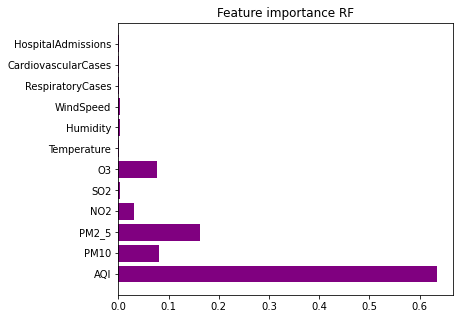

In [48]:
features_rf= X_train.columns

plt.figure(figsize=(6,5))
plt.barh(features_rf, feature_importance_rf, color='purple')
plt.title('Feature importance RF')
plt.show()